In [22]:
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [24]:
# Importando as Principais bibliotecas usadas na Analise de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Lendo o dataframe e salvando em uma variavel
pd.set_option('display.width', None)
df = pd.read_csv('global_food_wastage_dataset.csv')

In [7]:
# Visualizando os dados do dataframe
display(df)

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
...,...,...,...,...,...,...,...,...
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95


In [8]:
# Função para saber os tidos de dados que estão no dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [9]:
# Verificando se tem Valores nulos
df.isnull().sum()

,0
Country,0
Year,0
Food Category,0
Total Waste (Tons),0
Economic Loss (Million $),0
Avg Waste per Capita (Kg),0
Population (Million),0
Household Waste (%),0


In [10]:
# Analisando as informação estatisticas
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [12]:
# Calcular o desperdicio total em toneladas e a perda economica total
desperdicio_total = df['Total Waste (Tons)'].sum()
perca_economica_total = df['Economic Loss (Million $)'].sum()

print('\nAnalise de Desperdicio e Perda Economica:')
print(f'Desperdicio total regiostrado: {desperdicio_total:,.2f} toneladas')
print(f'Perda economica total registrada: ${perca_economica_total:,.2f} Milhões')


Analise de Desperdicio e Perda Economica:
Desperdicio total regiostrado: 125,308,900.36 toneladas
Perda economica total registrada: $125,198,519.35 Milhões


In [15]:
# Calculo a média de desperdicio e perda por registro
desperdicio_medio = df['Total Waste (Tons)'].mean()
perda_economica_media = df['Economic Loss (Million $)'].mean()
print(f'\nDesperdicio médio por registro: {desperdicio_medio: ,.2f} toneladas')
print(f'Perda economica média por registro: ${perda_economica_media: ,.2f} Milhões')


Desperdicio médio por registro:  25,061.78 toneladas
Perda economica média por registro: $ 25,039.70 Milhões


In [16]:
# Top 5 países com maior desperdício total
print("--- Top 5 Países com Maior Desperdício de Alimentos ---")
top_waste_countries = df.sort_values(by='Total Waste (Tons)', ascending=False).head(5)
print(top_waste_countries[['Country', 'Total Waste (Tons)']])
print("\n")

--- Top 5 Países com Maior Desperdício de Alimentos ---
      Country  Total Waste (Tons)
3090    Spain            49990.76
2856      USA            49989.46
2294    India            49983.05
2243  Germany            49956.72
1537    Japan            49948.23




In [17]:
# Média de perda econômica por categoria de alimento
print("--- Média de Perda Econômica por Categoria de Alimento ---")
avg_economic_loss = df.groupby('Food Category')['Economic Loss (Million $)'].mean().sort_values(ascending=False)
print(avg_economic_loss)
print("\n")

--- Média de Perda Econômica por Categoria de Alimento ---
Food Category
Beverages              25557.401925
Frozen Food            25470.776762
Meat & Seafood         25375.584116
Fruits & Vegetables    25196.827710
Prepared Food          25145.772068
Dairy Products         24713.406981
Bakery Items           24661.863381
Grains & Cereals       24139.654254
Name: Economic Loss (Million $), dtype: float64




In [21]:
#  Correlação entre População e Desperdício Total

print("--- Correlação entre População e Desperdício Total ---")

# Calculando a correlação de Pearson
# 'Total Waste (Tons)' e 'Population (Million)' são as colunas de interesse
correlation = df['Total Waste (Tons)'].corr(df['Population (Million)'])

print(f"O coeficiente de correlação (r) entre População e Desperdício Total é: {correlation:.2f}")

# Interpretação:
# r entre 0.7 e 1.0 (ou -0.7 e -1.0): Forte correlação
# r entre 0.3 e 0.7 (ou -0.3 e -0.7): Correlação moderada
# r entre 0.0 e 0.3 (ou -0.0 e -0.3): Fraca ou nenhuma correlação

--- Correlação entre População e Desperdício Total ---
O coeficiente de correlação (r) entre População e Desperdício Total é: 0.02


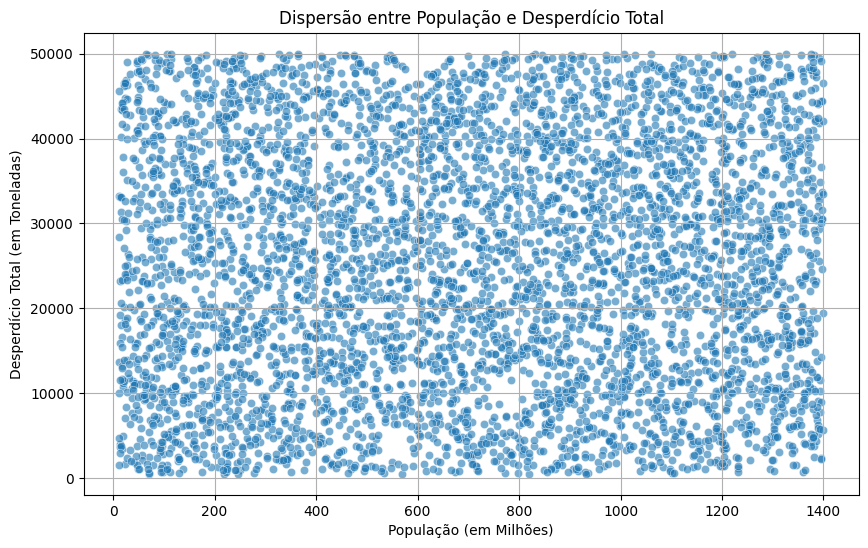

In [25]:
# Criação de um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population (Million)', y='Total Waste (Tons)', data=df, alpha=0.6)
plt.title('Dispersão entre População e Desperdício Total')
plt.xlabel('População (em Milhões)')
plt.ylabel('Desperdício Total (em Toneladas)')
plt.grid(True)
plt.show()


--- Variação do Desperdício Per Capita no Brasil ao Longo do Tempo ---
      Year  Avg Waste per Capita (Kg)
342   2018                      46.30
344   2018                      61.08
405   2018                     150.15
4308  2018                      99.24
4507  2018                      45.44
...    ...                        ...
955   2024                      29.77
996   2024                      27.30
980   2024                      95.75
964   2024                     119.04
4427  2024                     153.46

[258 rows x 2 columns]


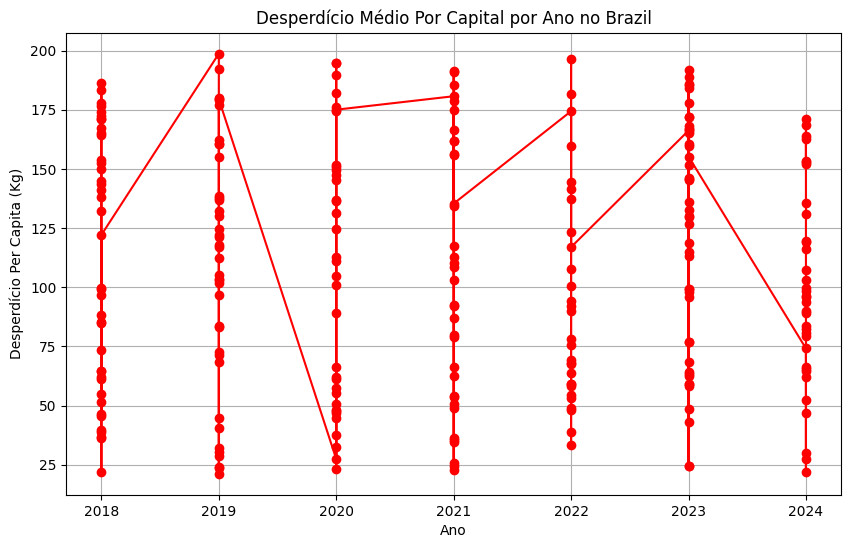

In [28]:
# Variação do Desperdício Por Capital ao Longo do Tempo para um País Específico

print("\n--- Variação do Desperdício Por Capital no Brasil ao Longo do Tempo ---")

# Escolha do país para análise
country_to_analyze = 'Brazil'

# Filtrar o DataFrame para incluir apenas os dados do país escolhido
df_country = df[df['Country'] == country_to_analyze]

# Garantir que os dados estejam ordenados por ano para a visualização
df_country = df_country.sort_values(by='Year')

# Exibir os dados filtrados
print(df_country[['Year', 'Avg Waste per Capita (Kg)']])

# Criação de um gráfico de linha para visualizar a tendência
plt.figure(figsize=(10, 6))
plt.plot(df_country['Year'], df_country['Avg Waste per Capita (Kg)'], marker='o', linestyle='-', color='red')
plt.title(f'Desperdício Médio Por Capital por Ano no {country_to_analyze}')
plt.xlabel('Ano')
plt.ylabel('Desperdício Per Capita (Kg)')
plt.grid(True)
plt.xticks(df_country['Year'].unique()) # Garante que cada ano no dado seja um ponto no eixo X
plt.show()
